In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
data = pd.read_csv('silver.csv')

In [3]:
rate_data = data[['USD']]

In [4]:
print("Shape of the dataset:", rate_data.shape)
print("First 10 rows of the dataset:")
print(rate_data.head(10))

Shape of the dataset: (13736, 1)
First 10 rows of the dataset:
      USD
0  24.645
1  25.200
2  25.915
3  25.655
4  25.640
5  25.005
6  25.050
7  24.625
8  24.380
9  24.265


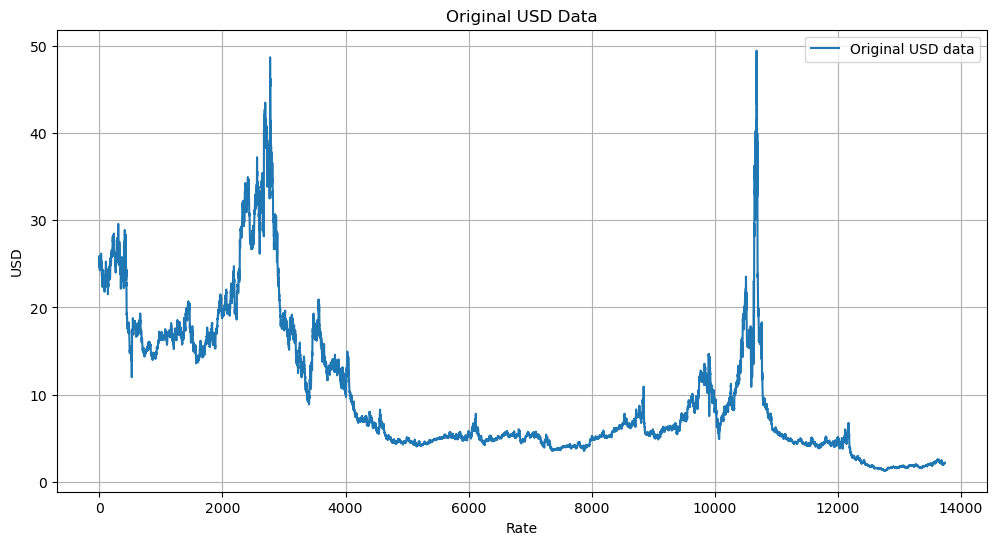

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(rate_data['USD'], label='Original USD data')
plt.title('Original USD Data')
plt.xlabel('Rate')
plt.ylabel('USD')
plt.legend()
plt.grid()
plt.show()

In [6]:
rolling_mean_5 = rate_data['USD'].rolling(window=5).mean()
rolling_mean_10 = rate_data['USD'].rolling(window=10).mean()

In [7]:
rolling_mean_5.head(10)
rolling_mean_10.head(20)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9     25.0380
10    25.0410
11    24.9875
12    24.8650
13    24.7810
14    24.6925
15    24.6560
16    24.6415
17    24.7410
18    24.8345
19    24.9095
Name: USD, dtype: float64

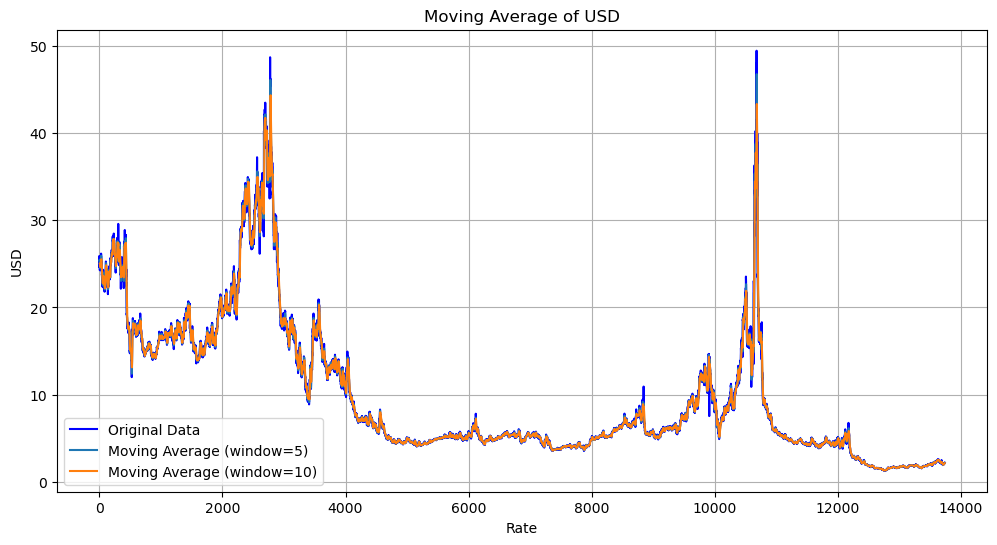

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(rate_data['USD'], label='Original Data', color='blue')
plt.plot(rolling_mean_5, label='Moving Average (window=5)')
plt.plot(rolling_mean_10, label='Moving Average (window=10)')
plt.title('Moving Average of USD')
plt.xlabel('Rate')
plt.ylabel('USD')
plt.legend()
plt.grid()
plt.show()

In [9]:
data.head()

,Date,USD,GBP,EURO
0,2022-04-21,24.645,18.87,22.61
1,2022-04-20,25.200,19.30,23.21
2,2022-04-19,25.915,19.89,24.01
3,2022-04-14,25.655,19.54,23.53
4,2022-04-13,25.640,19.72,23.68


In [10]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data_monthly = data.resample('MS').mean()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_usd = pd.Series(
    scaler.fit_transform(data_monthly[['USD']]).flatten(),
    index=data_monthly.index,
    name='USD_scaled'
)



Text(0.5, 1.0, 'Visual evaluation')

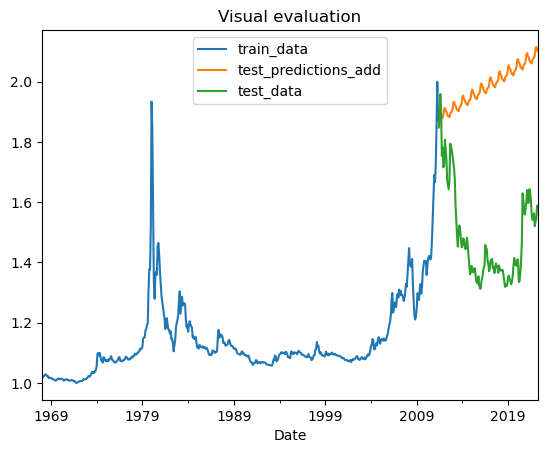

In [11]:
scaled_usd=scaled_usd+1  
x=int(len(scaled_usd)*0.8)
train_data = scaled_usd[:x]
test_data = scaled_usd[x:]
from sklearn.metrics import mean_squared_error

model_add = ExponentialSmoothing(train_data, trend='add', seasonal='mul').fit()

test_predictions_add = model_add.forecast(steps=len(test_data))

ax=train_data.plot()
test_predictions_add.plot(ax=ax)
test_data.plot(ax=ax)
ax.legend(["train_data", "test_predictions_add","test_data"])
ax.set_title('Visual evaluation')



In [12]:
np.sqrt(mean_squared_error(test_data, test_predictions_add))

np.sqrt(scaled_usd.var()),scaled_usd.mean()

(0.19657260365496385, 1.2105905673587523)

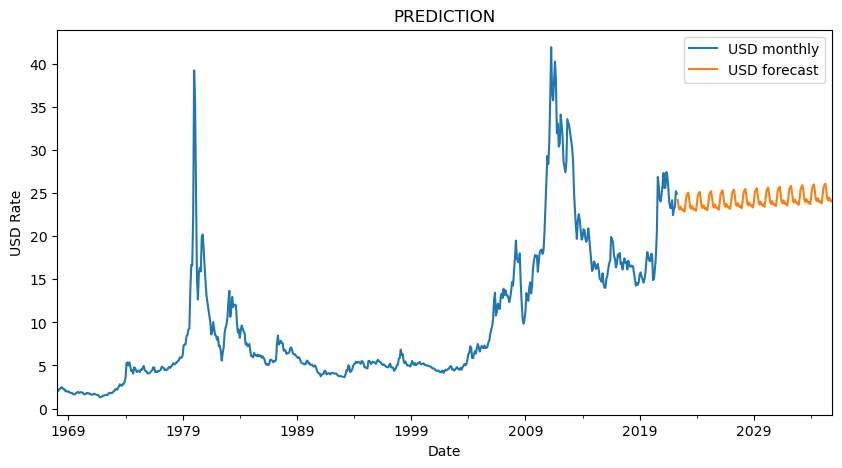

In [13]:
usd_series = data_monthly['USD']

model = ExponentialSmoothing(usd_series, trend='add', seasonal='mul', seasonal_periods=12).fit()

predictions = model.forecast(steps=int(len(usd_series)/4))

ax = usd_series.plot(figsize=(10, 5))
predictions.plot(ax=ax)
ax.legend(["USD monthly", "USD forecast"])
ax.set_xlabel('Date')
ax.set_ylabel('USD Rate')
ax.set_title('PREDICTION')
plt.show()

